<a href="https://colab.research.google.com/github/Snaiyer1/MAT_421/blob/main/Module_B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Larange Polynomial Interpolation**

Instead of finding cubic polynomials between subsequent paris of data points, we can find a single polynomial which goes through all the data points. This is known as a Larange polynomial, L(x), which has the property L(xi) = yi for every point in the data set.  We can write these polynomials as a linear combination of Larange basis polynomials, Pi(x), where $Pi(x) = ∏nj=1,j≠i(x−xj)/(xi−xj),
 $
and $L(x)=∑ni=1 yiPi(x).
$

By contruction, Pi(x) has the property Pi(xj) = 1 when i == j and Pi(xj) = 0 when i ≠ j. Since L(x) is the sum of these polynomials, L(xi) = yi for every point.

Lets try to find the Larange basis polynomial for x = [0, 1, 2] and y = [1, 3, 2]. We can plot each polynomial to check the properties above:

In [3]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

plt.style.use('ggplot')

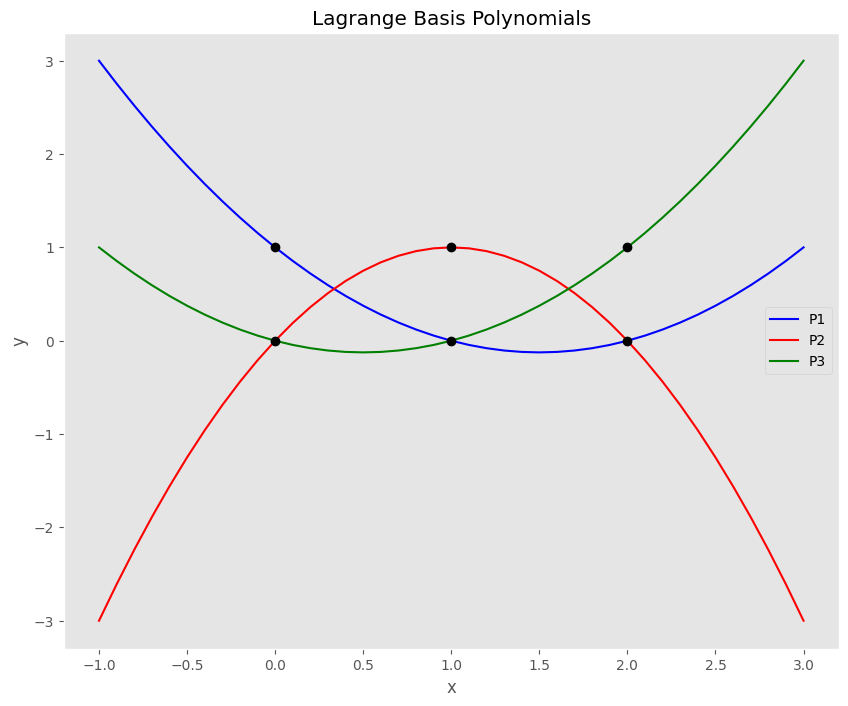

In [4]:
x = [0, 1, 2]
y = [1, 3, 2]
P1_coeff = [1,-1.5,.5]
P2_coeff = [0, 2,-1]
P3_coeff = [0,-.5,.5]

# get the polynomial function
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(-1.0, 3.1, 0.1)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

Here's the Larange polynomial and we can check that it goes through each data point:

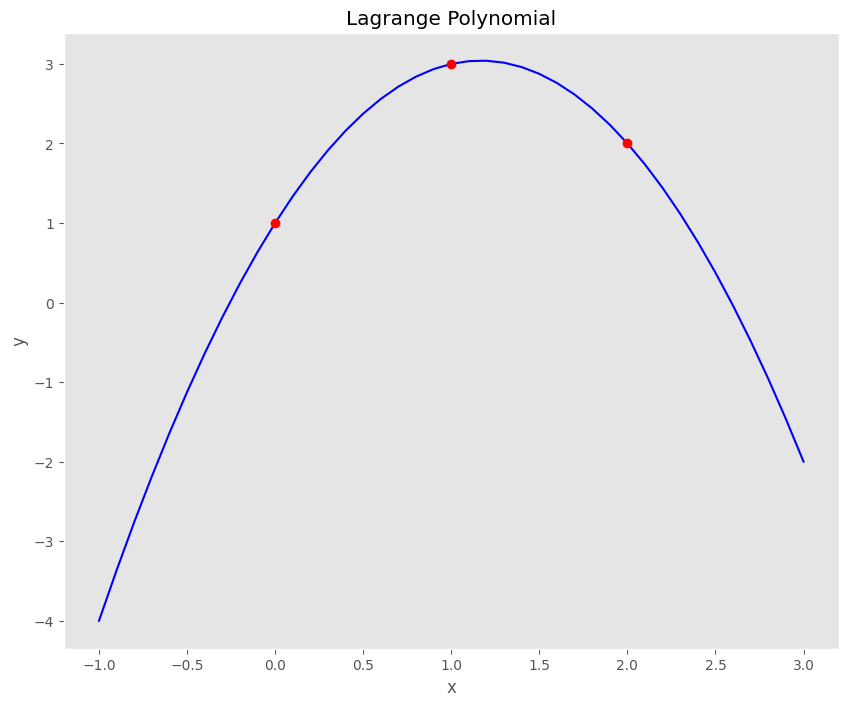

In [5]:
L = P1 + 3*P2 + 2*P3

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Larange interpolation polynomials are defined outside the area of interpolation, so outside [x1, xn]. They will grow fast and unbound outside this region, but this is not the behavior of the underlying data. Therefore, Larange interpolation should not be used to interpolate outside this region.

We can calculate everything in scipy using the larange function directly:

In [6]:
from scipy.interpolate import lagrange

In [7]:
f = lagrange(x, y)

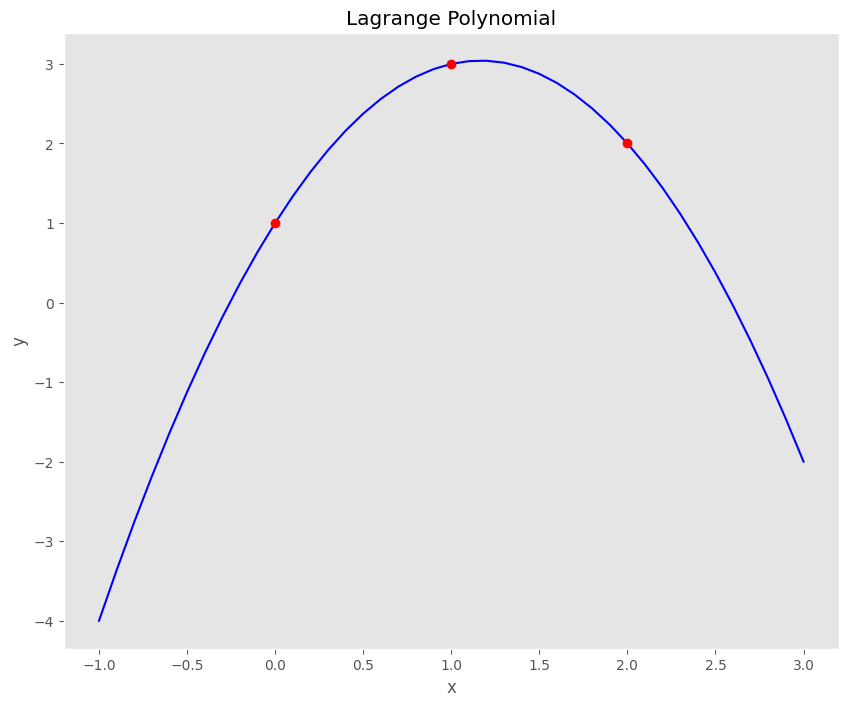

In [8]:
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Newton's Polynomial Interpolation**

This is another way to fit exactly for a set of data points. The form for an n-1 order Newton's polynomial that goes through n points is:
f(x)=a0+a1(x−x0)+a2(x−x0)(x−x1)+⋯+an(x−x0)(x−x1)…(x−xn)
or
f(x)=∑n i=0 aini(x) where, $ni(x)=∏i−1j=0(x−xj)
$

We can determine the coefficients ai of the Newton's polynomial quite easily. Since the polynomial goes through each data point, for (xi, yi) we will have f(xi) = yi. Thus, f(x0)=a0=y0 and f(x1)=a0+a1(x1−x0)=y1. Rearranging, we get a1=(y1−y0)/(x1−x0) and if we instert data points (x2, y2), a2 = (((y2−y1)/(x2−x1))−((y1−y0)/(x1−x0)))/x2−x0. We can keep inserting more data points (x3, y3),...,(xn, yn) follwing the same pattern. This is called divided differences:
f[xk,xk−1,…,x1,x0]=f([xk,xk−1,…,x2,x2]−f[xk−1,xk−2,…,x1,x0])/xk−x0

Once the coefficients are determined, adding new data points won't change calculated ones. The procedure to find these coefficients can be summarized into a dividied differences table and each element can be calculated using the two previous elements. We can calculate and store each element into a diagonal matrix.

Let's look at this for x = [-5, -1, 0, 2] and y = [-2, 6, 1, 3]:

In [10]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline

In [13]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial
    at x
    '''
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

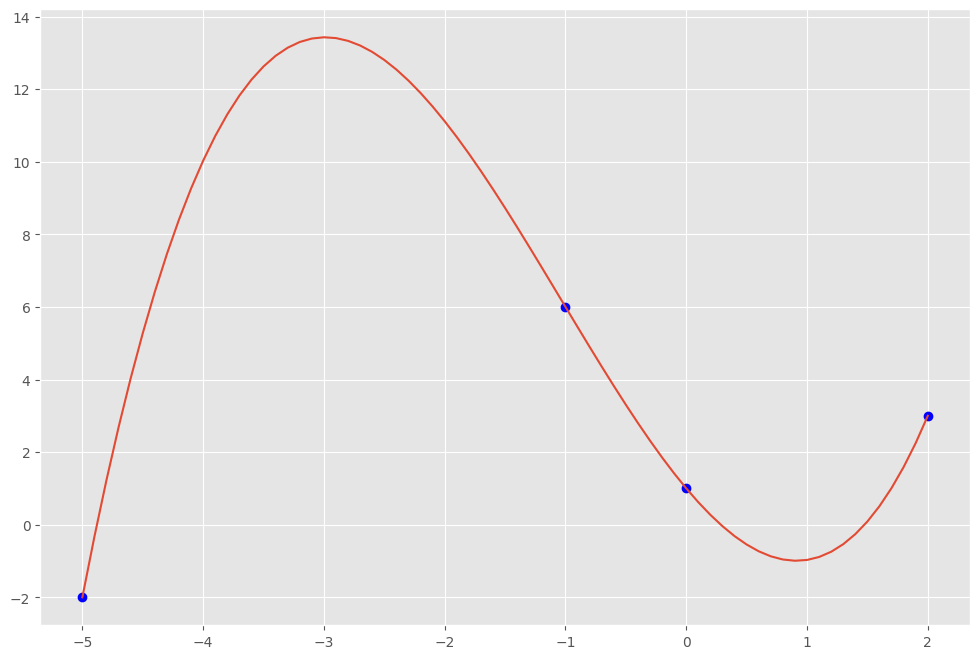

In [12]:
x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)